In [1]:
from peak_warming_calculator import peak_warming_calculator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

In [3]:
import time

In [4]:
import pandas as pd

# Sensitivity Analysis

In [5]:
r_minus_g = 0.015
consumption_growth = 0.02
consumption_discount = consumption_growth + r_minus_g

In [6]:
num_of_sample = 6
# gamma_sample = np.linspace(2, 2*2, num_of_sample)
D0_sample = np.linspace(0.00236, 0.00236*2, num_of_sample)
D2_sample = np.linspace(0.01, 0.01*2, num_of_sample)

In [7]:
T = 2
# gamma_sample = (1/np.log(2))*np.log(D2_sample/D0_sample)

In [8]:
# D2_sample

In [9]:
# gamma_sample

In [10]:
P_100 = 300
P_50 = 0.4 * P_100
r = consumption_discount
s = 3 * r
T_TCRE_1 = 0.00045

In [11]:
peak_T_list = []
output_data_list = []

for i in range(num_of_sample):
#     gamma = gamma_sample[i]
    D2 = D2_sample[i]
    print(i)
    
    peak_T_const_gamma = []
    output_data_const_gamma = []
    for j in range(num_of_sample):
        D0 = D0_sample[j]
        gamma = (1/np.log(2))*np.log(D2/D0)
        peak_T, output_data = peak_warming_calculator(P_50=P_50, P_100=P_100, gamma=gamma, D0=D0, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, T_TCRE_1=T_TCRE_1, delta_T=1.5, return_all_output=True)
#         print(D0, gamma, peak_T)
#         print(peak_T)
        peak_T_const_gamma.append(peak_T)
        output_data_const_gamma.append(output_data)
#         peak_T_list.append(peak_T)
    
    peak_T_list.append(peak_T_const_gamma)
    output_data_list.append(output_data_const_gamma)



0


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calc/peak_warming_calculator.py:141: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


1
2
3
4
5


In [12]:
peak_T_array = np.asarray(peak_T_list)

In [13]:
D0_sample_i, D2_sample_i = np.meshgrid(D0_sample, D2_sample)

In [14]:
D2_sample_i

array([[0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.014, 0.014, 0.014, 0.014, 0.014, 0.014],
       [0.016, 0.016, 0.016, 0.016, 0.016, 0.016],
       [0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
       [0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ]])

In [15]:
D0_sample_i

array([[0.00236 , 0.002832, 0.003304, 0.003776, 0.004248, 0.00472 ],
       [0.00236 , 0.002832, 0.003304, 0.003776, 0.004248, 0.00472 ],
       [0.00236 , 0.002832, 0.003304, 0.003776, 0.004248, 0.00472 ],
       [0.00236 , 0.002832, 0.003304, 0.003776, 0.004248, 0.00472 ],
       [0.00236 , 0.002832, 0.003304, 0.003776, 0.004248, 0.00472 ],
       [0.00236 , 0.002832, 0.003304, 0.003776, 0.004248, 0.00472 ]])

In [16]:
peak_T_array

array([[2.35388105, 2.45529909, 2.56211556, 2.6780189 , 2.80468011,
        2.94273573],
       [2.19685562, 2.26579079, 2.34269756, 2.42232995, 2.50771523,
        2.60087979],
       [2.08528945, 2.14027061, 2.19435941, 2.25371406, 2.31684642,
        2.38317738],
       [2.00744558, 2.04674149, 2.09111956, 2.13477956, 2.18264426,
        2.23351876],
       [1.94347035, 1.97621292, 2.01314824, 2.04799635, 2.08402364,
        2.12348655],
       [1.89692516, 1.92392168, 1.94952305, 1.98032132, 2.00810602,
        2.04006023]])

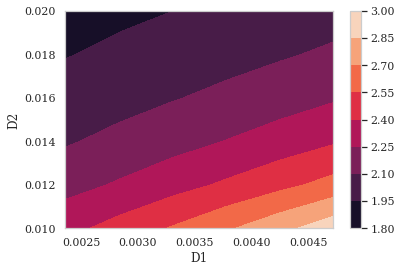

In [17]:
fig, axs = plt.subplots(1,1)

cs = axs.contourf(D0_sample_i, D2_sample_i, peak_T_array)
plt.xlabel("D1")
plt.ylabel("D2")
# plt.ylim(2, 3.25)
fig.colorbar(cs, ax=axs)
# fig.savefig('paper_figures/Nordhaus_peak_T_sensitivity.png', bbox_inches='tight', dpi = 300)

In [18]:
SCC_list = []

for j in range(len(output_data_list)):
    SCC_const_gamma = []
    for i in range(len(output_data_list[j])):
        if type(output_data_list[j][i]) is pd.DataFrame:
            SCC = output_data_list[j][i]['SCC'].loc[2020]
        else:
            SCC = None
        SCC_const_gamma.append(SCC)
    SCC_list.append(SCC_const_gamma)

In [19]:
SCC_array = np.asarray(SCC_list)

NameError: name 'gamma_sample_i' is not defined

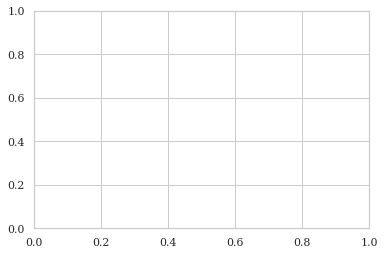

In [20]:
fig, axs = plt.subplots(1,1)

cs = axs.contourf(D0_sample_i, gamma_sample_i, SCC_array)
plt.xlabel("D0")
plt.ylabel("gamma")
# plt.ylim(2, 3.25)
fig.colorbar(cs, ax=axs)

# fig.savefig('paper_figures/Nordhaus_SCC_sensitivity.png', bbox_inches='tight', dpi = 300)